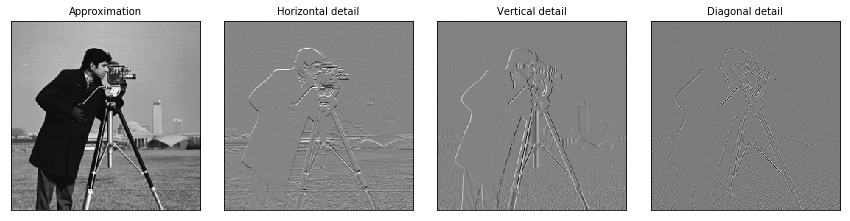

In [12]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

#Load image
original = pywt.data.camera()

#wavelet transform of image, and plot approximation and details
titles = ['Approximation', 'Horizontal detail','Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12,3))
for i, a in enumerate([LL, LH, HL, HH]):
  ax = fig.add_subplot(1,4,i +1)
  ax.imshow(a, interpolation="nearest",cmap=plt.cm.gray)
  ax.set_title(titles[i],fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])
  
fig.tight_layout()
plt.show()

In [13]:
print(LL.shape)
print(LH.shape)
print(HL.shape)
print(HH.shape)

(258, 258)
(258, 258)
(258, 258)
(258, 258)


In [0]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3
label_levels = 3

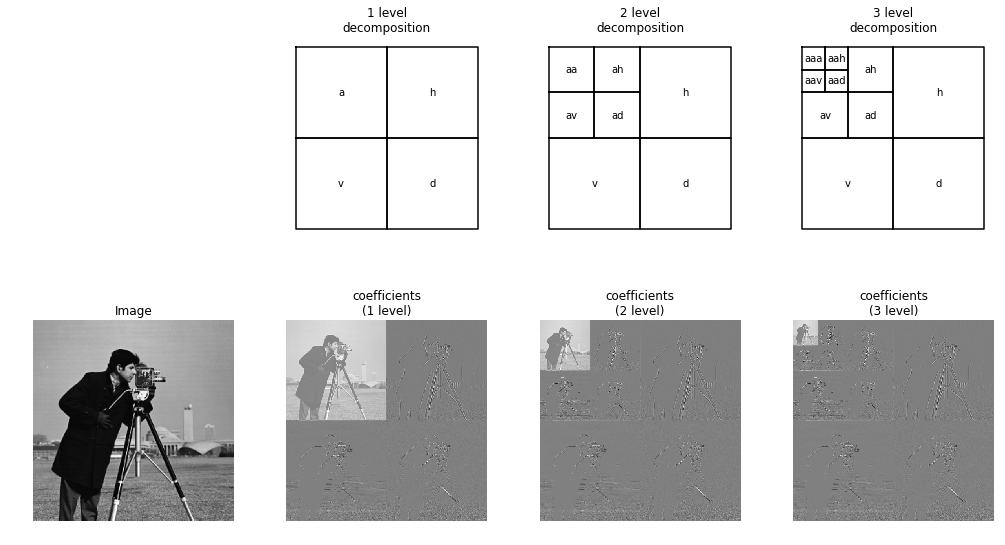

In [15]:
fig, axes = plt.subplots(2, 4, figsize = [14,8])
for level in range(0, max_lev +1 ):
  if level == 0:
    axes[0, 0].set_axis_off()
    axes[1, 0].imshow(x, cmap=plt.cm.gray)
    axes[1, 0].set_title('Image')
    axes[1, 0].set_axis_off()
    continue
    
  draw_2d_wp_basis(shape, wavedec2_keys(level), ax = axes[0, level],
                   label_levels = label_levels)
  axes[0,level].set_title('{} level\ndecomposition'.format(level))
  
  c =pywt.wavedec2(x,'db2', mode = 'periodization', level = level)
  
  c[0]/=np.abs(c[0]).max()
  for detail_level in range(level):
    c[detail_level + 1] =[d/np.abs(d).max() for d in c[detail_level +1]]
    
  arr, slices = pywt.coeffs_to_array(c)
  axes[1, level].imshow(arr, cmap = plt.cm.gray)
  axes[1, level].set_title('coefficients\n({} level)'.format(level))
  axes[1, level].set_axis_off()
  
plt.tight_layout()
plt.show()

In [0]:
def imshows(ImageData, LabelData, rows, cols, gridType = True):
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  from matplotlib import pyplot as plt
  fig = plt.figure(figsize=(10,10))
  for i in range(1, cols*rows +1):
    fig.add_subplot(rows, cols, i)
    image = ImageArray[i - 1]
    if (len(image.shape)<3):
      plt.imshow(image, plt.cm.gray)
      plt.grid(gridType)
    else:
      plt.imshow(image)
      plt.grid(gridType)
    plt.title(LabelArray[i-1])
  plt.show()
  
def Shape(Image):
  return "Shape :" + str(Image.shape)
  print()

levels: 2


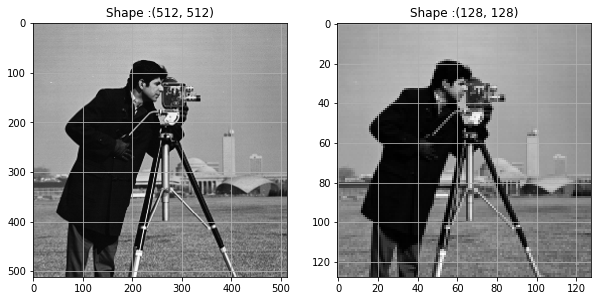

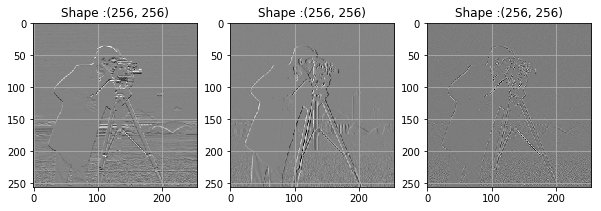

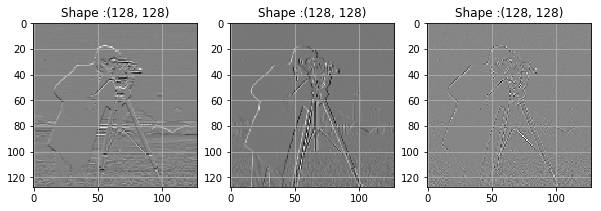

In [17]:
import pywt, numpy
coeffs = pywt.wavedec2(original, 'db1', level = 2)
cA2, (cH2, cV2, cD2),(cH1, cV1,cD1) = coeffs
print("levels:", len(coeffs)-1)
imshows([original, cA2],[Shape(original), Shape(cA2)],1,2)
imshows([cH1,cV1,cD1],[Shape(cH1), Shape(cV1), Shape(cD1)],1,3)
imshows([cH2, cV2, cD2],[Shape(cH2), Shape(cV2), Shape(cD2)],1,3)

levels: 2


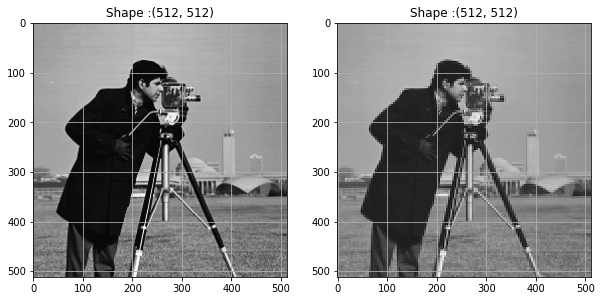

In [18]:
import pywt, numpy
coeffs = pywt.wavedec2(original, 'db1', level = 2)
print("levels:", len(coeffs)-1)
cA2,(cH2, cV2, cD2),(cH1, cV1, cD1) = coeffs
cH2 = cH2 * 0
cD2 = cD2 * 0
cV2 = cV2 * 0
coeffs = cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)
reconstruct_img = pywt.waverec2(coeffs, 'db1')
imshows([original, reconstruct_img],[Shape(original),Shape(reconstruct_img)],1,2)

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
linken = "gdirve/My Drive/TTH_Digital_Image_Processing/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import os
linken = "gdrive/My Drive/TTH_Digital_Image_Processing/"
print(os.path.isdir(linken))
print(os.path.isfile(linken + "Lab05Data/cubic_indoor.jpg"))
print(os.path.isfile(linken + "Lab05Data/nemo1.jpg"))

True
False
False


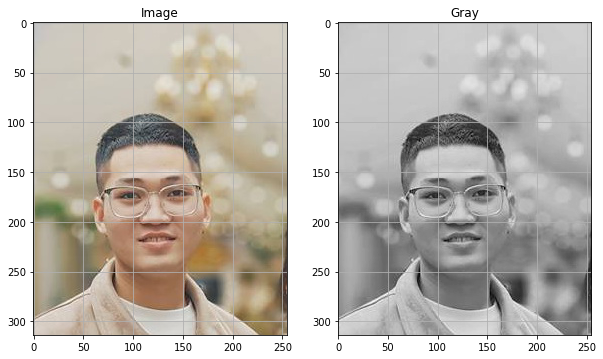

In [21]:
from pylab import imread
from skimage.color import rgb2gray
imglink= linken + "Dataset_01/Face 01.jpg"
img = imread(imglink)
gray = rgb2gray(img)
imshows([img, gray], ["Image", "Gray"], 1, 2)

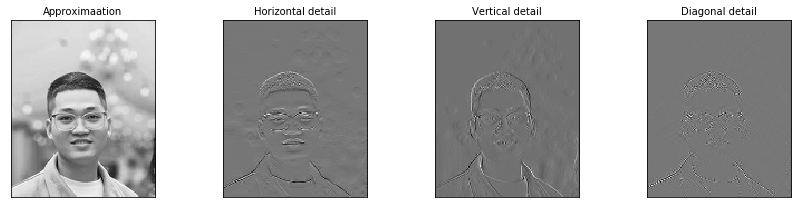

In [31]:
original = gray

titles = ['Approximaation', 'Horizontal detail', 'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12,3))
for i, a in enumerate([LL, LH, HL, HH]):
  ax = fig.add_subplot(1,4,i +1)
  ax.imshow(a, interpolation="nearest", cmap = plt.cm.gray)
  ax.set_title(titles[i], fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])

fig.tight_layout()
plt.show()

levels: 2


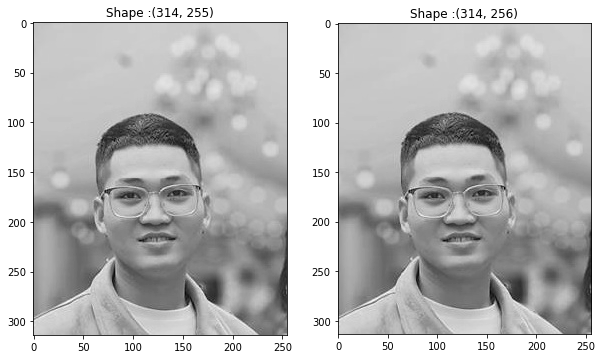

In [36]:
import pywt, numpy
coeffs = pywt.wavedec2(original, 'db1', level = 2)
print("levels:", len(coeffs)-1)
cA2,(cH2, cV2, cD2),(cH1, cV1, cD1) = coeffs
cH2 = cH2 * 1
cD2 = cD2 * 1
cV2 = cV2 * 1
coeffs = cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)
reconstruct_img = pywt.waverec2(coeffs, 'db1')
imshows([original, reconstruct_img],[Shape(original),Shape(reconstruct_img)],1,2,0)
original = gray